<a class="anchor" id="0"></a>
# **AISC2007 - Deep Learning - Group Assignment 1 - Group E**

<!DOCTYPE html>
<html>
<head>
  <title align='center'>Group E MECE Table</title>
   <style>
    /* CSS rule for center-aligning the title */
    title {
      text-align: center;
    }
    /* CSS rules for the table styling */
    table {
      border-collapse: collapse;
      width: 100%;
    }
    th, td {
      text-align: left;
      padding: 8px;
      border-bottom: 2px solid #000;
      border-right: 2px solid #000;
    }
    th {
      background-color: #f2f2f2;
      border-right: 2px solid #000;
    }
    td:last-child, th:last-child {
      border-right: none;
    }
  </style>
</head>
<body>
  <table>
    <tr>
      <th>S.NO</th>
      <th>Name</th>
      <th>Tasks</th>
    </tr>
    <tr>
      <td>1 </td>
      <td>Harsha</td>
      <td>Exploratory Data Analysis - Univariate Analysis</td>
    </tr>
    <tr>
      <td>2 </td>
      <td>Amber</td>
      <td>Exploratory Data Analysis - Bivariate Analysis</td>
    </tr>
    <tr>
      <td>3 </td>
      <td>Kumar Dahal</td>
      <td>Hypothesis Testing</td>
    </tr>
     <tr>
      <td>4 </td>
      <td>Abhishek Singh</td>
      <td>Feature Selection - PCA</td>
    </tr>
    <tr>
      <td>5 </td>
      <td>Gowtham</td>
      <td>Data Preprocessing - Handling Data - Numerical variables</td>
    </tr>
    <tr>
      <td>6 </td>
      <td>Srinivasateja</td>
      <td>Data Preprocessing - Handling Data - Categorical variables</td>
    </tr>
    <tr>
      <td>7 </td>
      <td>Snehalatha</td>
      <td>Model Building using Logistic Regression</td>
    </tr>
    <tr>
      <td>8 </td>
      <td>Jai Doshi</td>
      <td>Model Building using DNN</td>
    </tr>
    <tr>
      <td>9 </td>
      <td>Girish Sai Thiruvidhula</td>
      <td>Model Evaluation</td>
    </tr>
  </table>
</body>
</html>


# **1. Dataset description** <a class="anchor" id="1"></a>

### **Objective**
To predict which customer is more likely to purchase the newly introduced telecom plan.


### **Attribute Information:**

### **Customer details:**
1. CustomerID: Unique customer ID
2. PlanTaken: Whether the customer has purchased the plan or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersons: Total number of persons planning to take the plan with the customer (since these are Friends and Family plans)
9. PreferredServiceStar: Preferred service rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfUpgrades: Average number of upgrades in a year by customer
12. iPhone: The customer has an iphone or not (0: No, 1: Yes)
13. PhoneContract: Whether the customers has a contracted phone or not (0: No, 1: Yes)
14. NumberOfChildren: Total number of children planning to take the plan with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer
### **Customer interaction data:**
1. PitchSatisfactionScore: Sales pitch satisfaction score
2. PlanPitched: Plan pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson
after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

# **2. Import libraries** <a class="anchor" id="2"></a>


In [66]:
#Importing the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from keras.models import Sequential   # initilizing the ann model
from keras.layers import Dense   # creating hidden layers
from tensorflow.keras.callbacks import EarlyStopping   # to stop early ephocs
from tensorflow.keras.layers import Dropout   # reduce hidden layers
from sklearn.metrics import classification_report   # accuracy, recall, presion and f1 score
import warnings
warnings.filterwarnings('ignore')

# **3.Import dataset** <a class="anchor" id="3"></a>

In [67]:
# Reading the Telecom sheet from the dataset
df = pd.read_excel('Telecom.xlsx', sheet_name='Telecom')

# Displaying the first ten rows to understand the data
df.head(10)

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


# **4. Exploratory Data Analysis** <a class="anchor" id="4"></a>



### Understanding the shape of the dataset.

In [68]:
# Displaing the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4888, 20)


* The dataset has 4888 rows and 20 columns of data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
PlanTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersons,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredServiceStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfUpgrades,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
iPhone,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


## **4.1 Univariate Analysis** <a class="anchor" id="4.1"></a>

### Plotting histograms for numerical features to visually examine the distribution of each feature

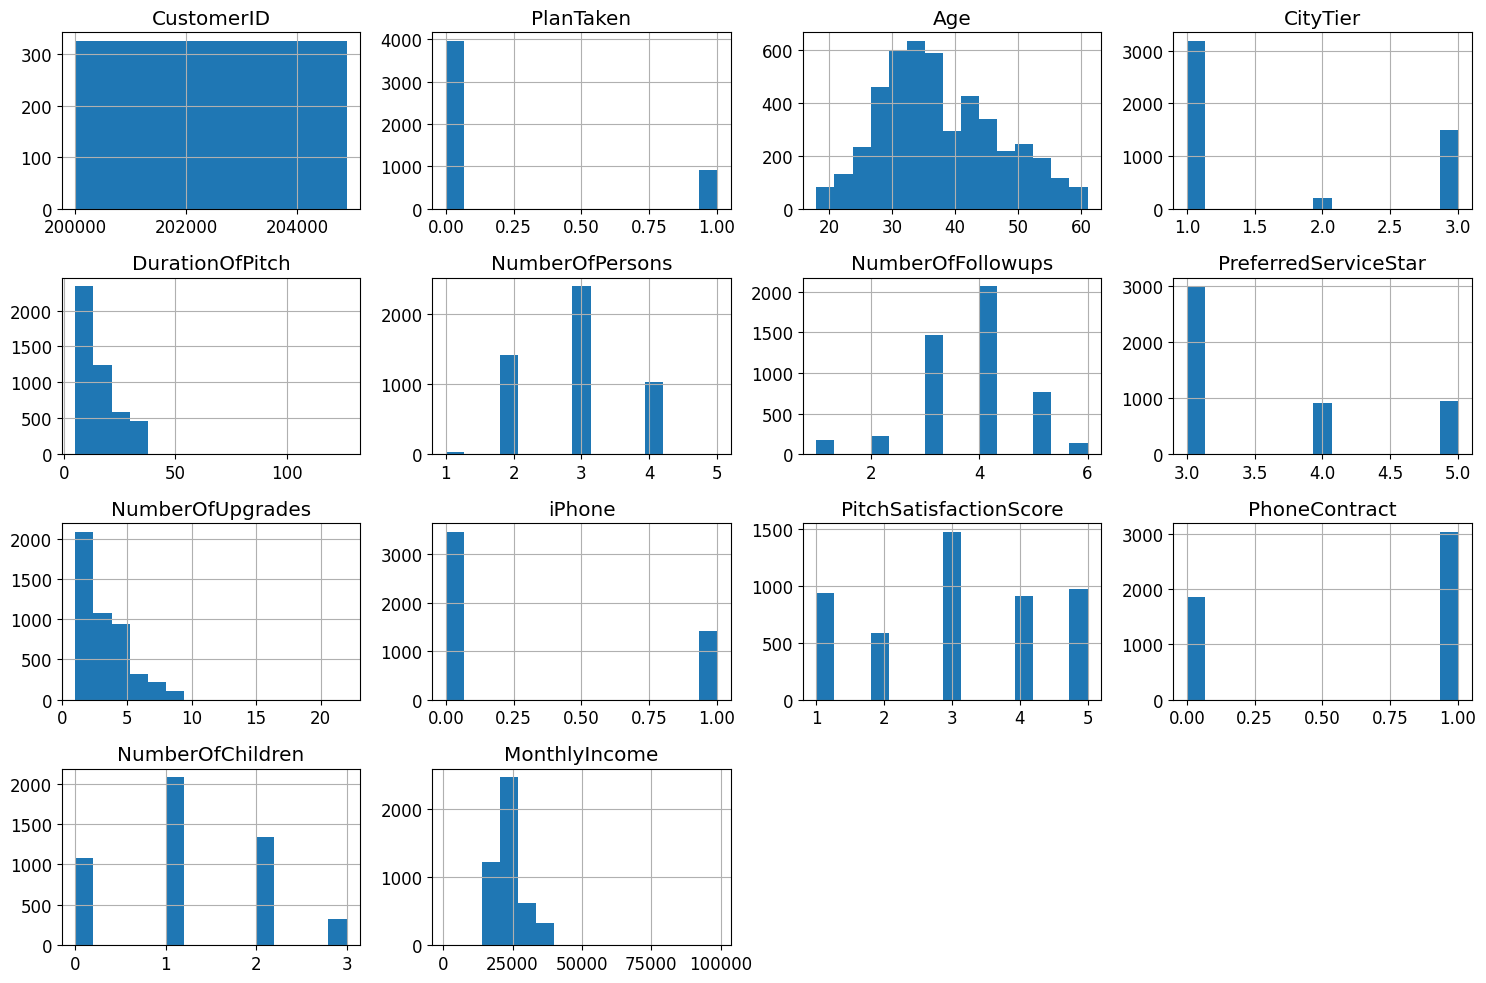

In [71]:
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Observations -**
* Many numerical features exhibit right-skewed distributions, indicating a concentration of lower values with a tail of higher values.
* The dataset contains missing values that need to be handled to ensure data completeness and reliability for analysis.
* Outliers, especially in the 'MonthlyIncome' column, can distort data distributions and affect predictive modeling.
* The range of values varies among features, and understanding these ranges is essential for selecting appropriate scaling methods.


In [72]:
df.isna().sum().sort_values()

CustomerID                  0
PlanTaken                   0
PhoneContract               0
CityTier                    0
PitchSatisfactionScore      0
Occupation                  0
Gender                      0
NumberOfPersons             0
Designation                 0
PlanPitched                 0
MaritalStatus               0
iPhone                      0
TypeofContact              25
PreferredServiceStar       26
NumberOfFollowups          45
NumberOfChildren           66
NumberOfUpgrades          140
Age                       226
MonthlyIncome             233
DurationOfPitch           251
dtype: int64

### Histogram and Boxplot distribution Visualization
* Histograms show the distribution of values within each column.
* Boxplots reveal the presence and extent of outliers.
* By examining these plots, we can assess the skewness of the distributions and the impact of outliers on mean values. This helps in deciding whether to use the median or mean for imputation:

In [73]:
# Defining the columns with missing values:
columns_with_missing_values = ['Age', 'DurationOfPitch', 'NumberOfFollowups',
                               'PreferredServiceStar', 'NumberOfUpgrades',
                               'NumberOfChildren', 'MonthlyIncome']

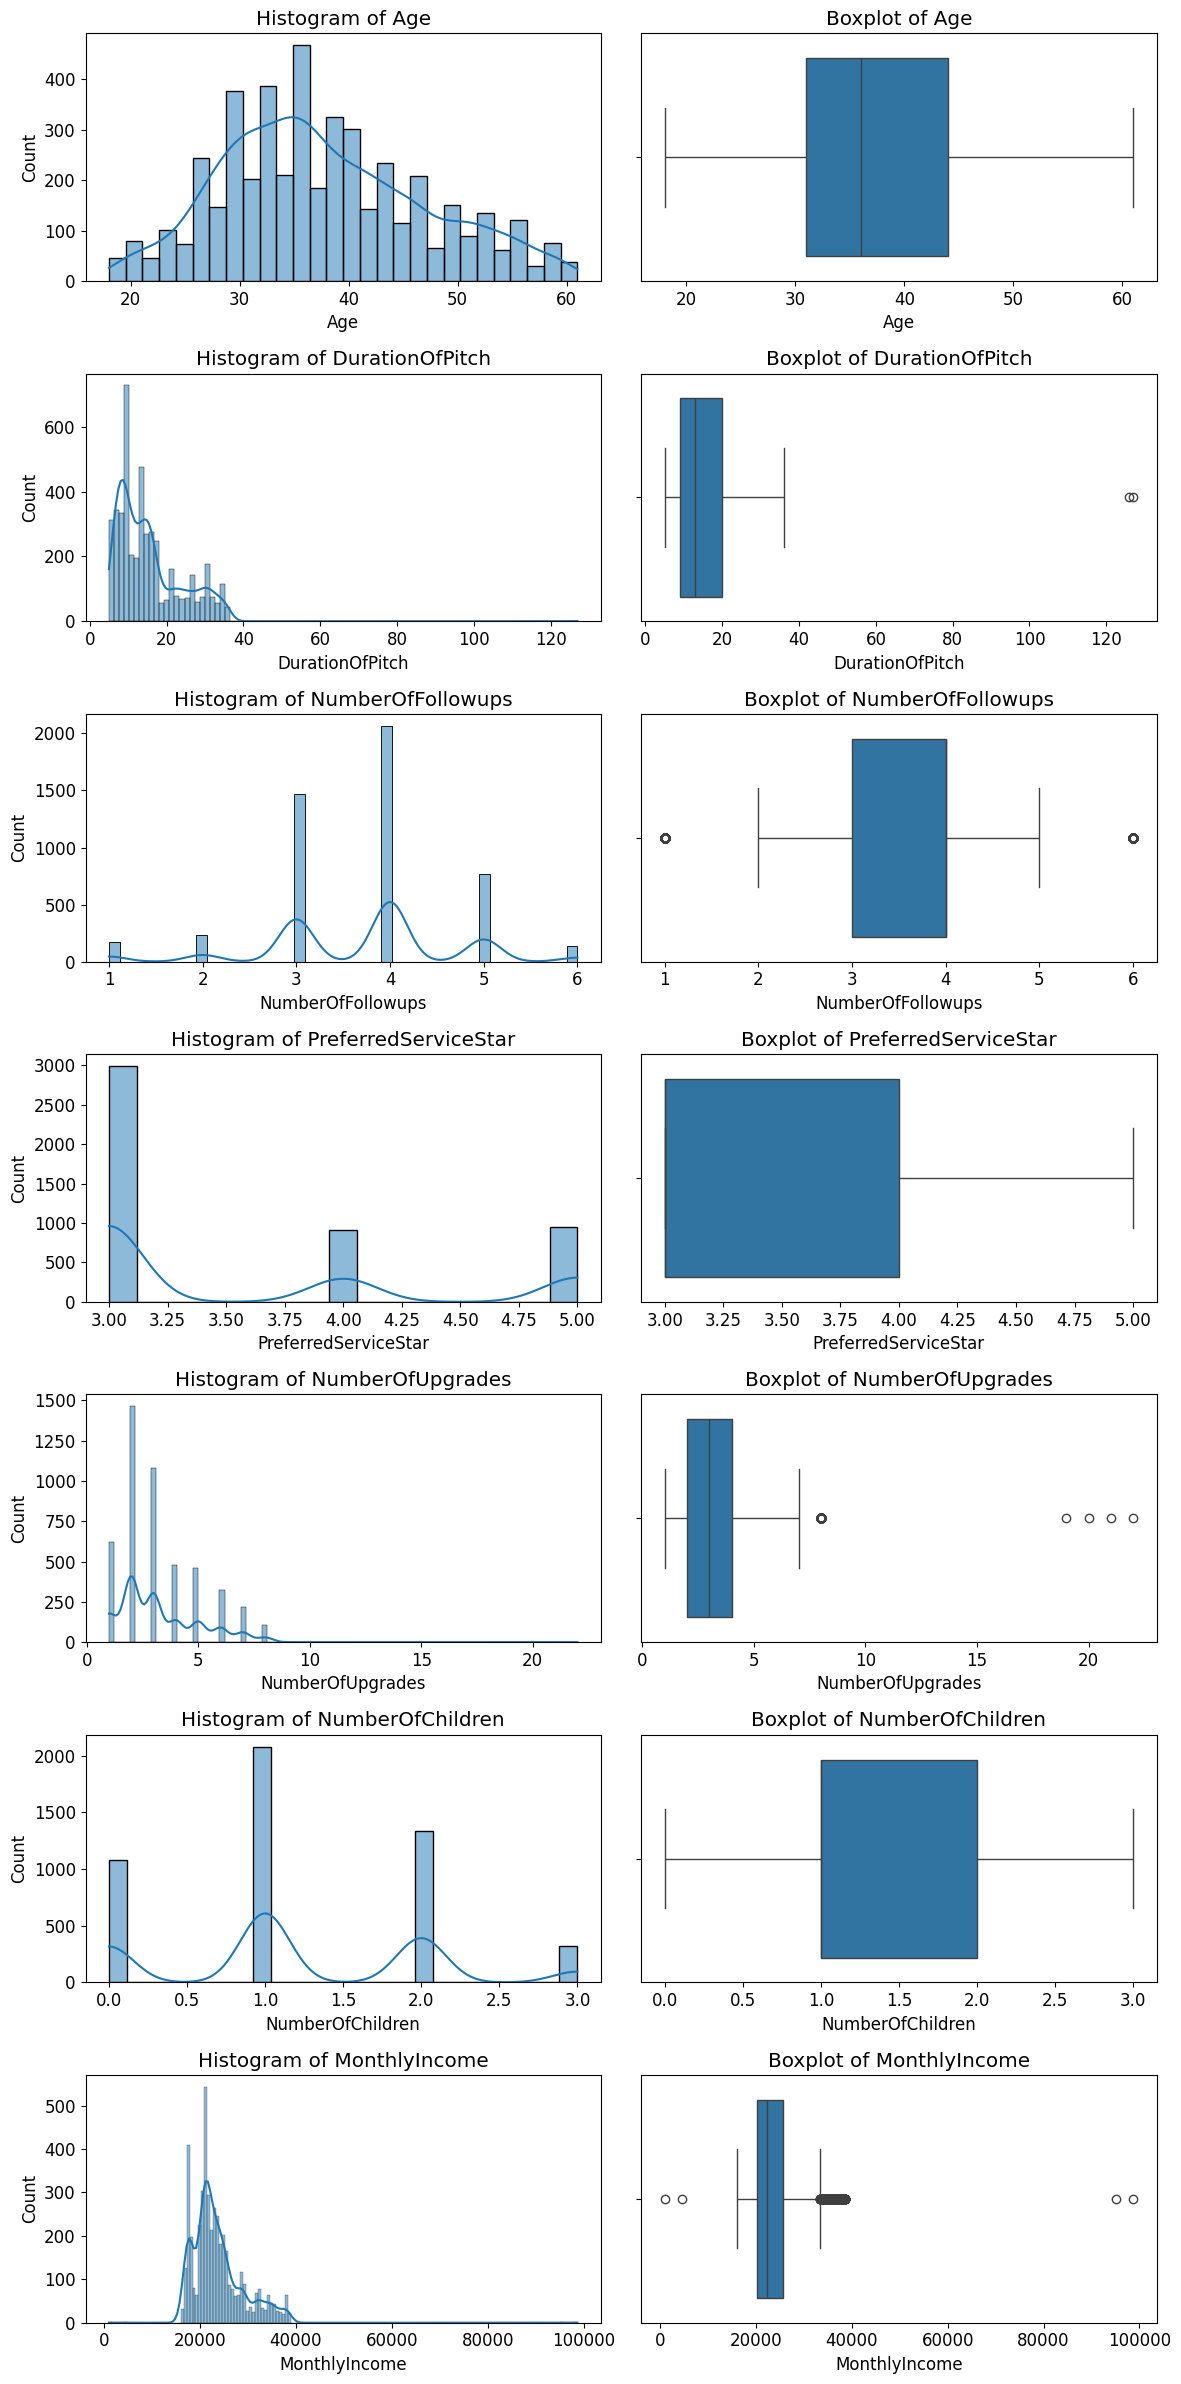

In [74]:
# Plotting histograms and boxplots for the columns to analyze the distributions:
fig, axes = plt.subplots(len(columns_with_missing_values), 2, figsize=(12, 24))

for i, col in enumerate(columns_with_missing_values):
    # Histogram
    sns.histplot(df[col], ax=axes[i][0], kde=True)
    axes[i][0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i][1])
    axes[i][1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### NOTE:
* If the distribution is relatively symmetric and lacks significant outliers, the mean might be a suitable choice.
* If the distribution is skewed or contains outliers, the median is generally more robust.

**Observation -**
* In our dataset the median was chosen as a general-purpose, robust approach to handle missing values.
* However, it's always a good practice to examine the distribution of each feature before deciding on the imputation strategy.
* If in case feature is normally distributed with no significant outliers, then mean could be a suitable choice for imputation.

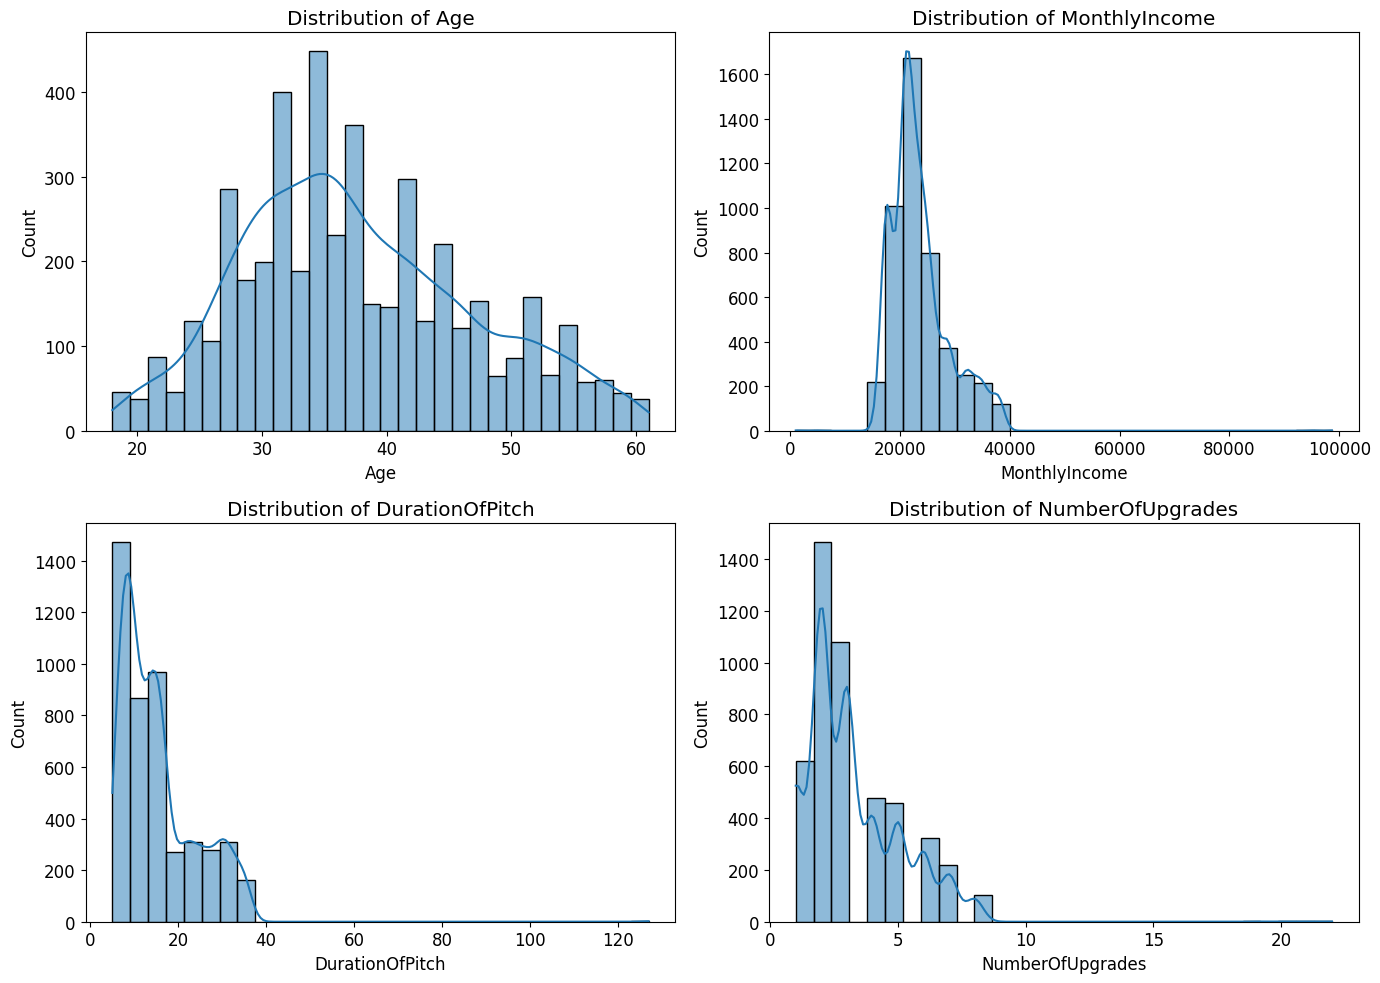

In [75]:
#Checking the distribution of the numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

variables = ['Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfUpgrades']

# Plotting the distributions
for i, var in enumerate(variables):
    sns.histplot(df[var], ax=axes[i//2, i%2], kde=True, bins=30)
    axes[i//2, i%2].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()



* All the distributions are slightly rightly skewed.

* Age: The distribution is somewhat normally distributed. Most customers are in their 30s and 40s.

* Monthly Income: There are a large number of customers have incomes in the lower range, with fewer customers having higher incomes. There are some outliers with very high incomes.

* Duration of Pitch: The duration of the pitch is mostly concentrated around 8 to 20 minute and longer pitches are less common.

* Number of Upgrades: Most customers have few upgrades, with the number decreasing as the number of upgrades increases.

## **4.2 Bivariate Analysis** <a class="anchor" id="4.2"></a>

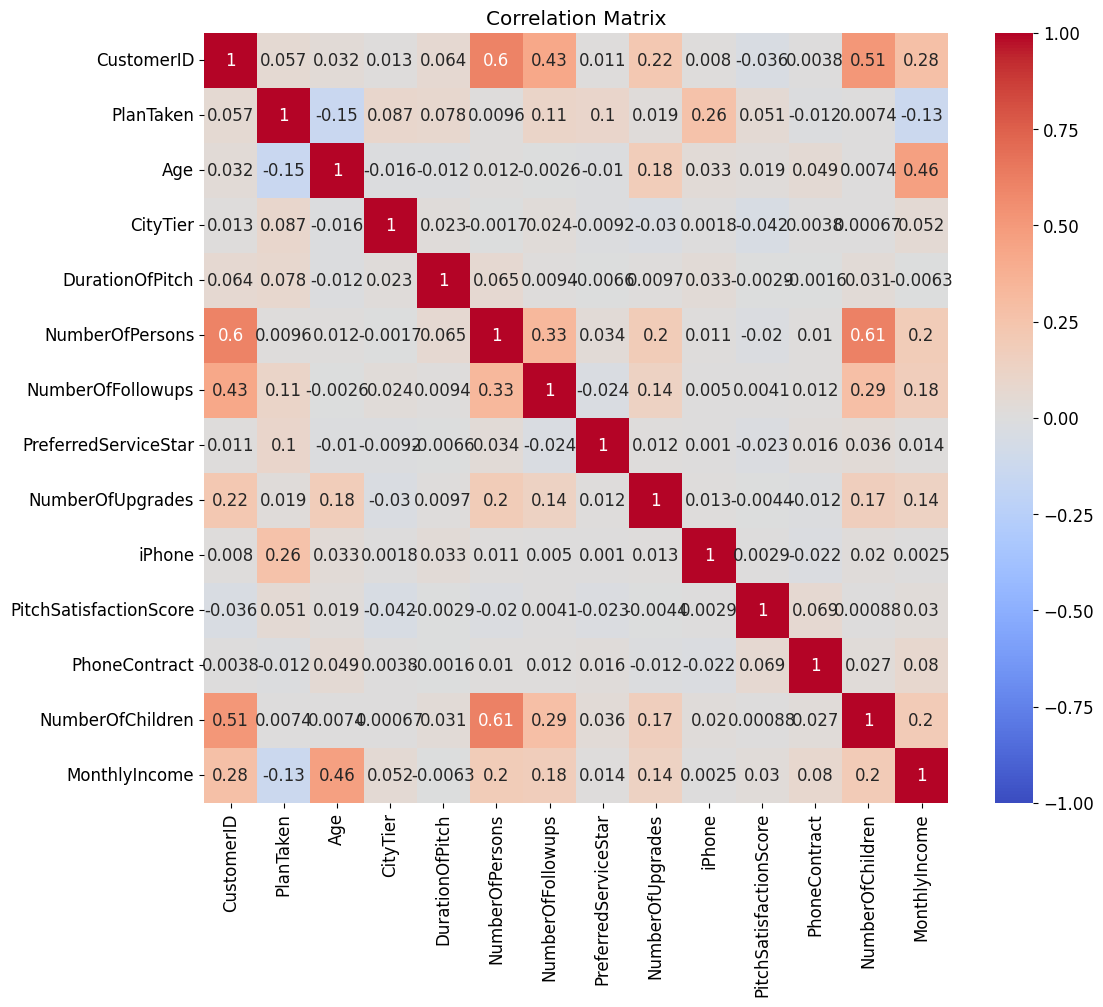

In [76]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

* There are no exceptionally high correlations between the variables and they do not appear to exceed common thresholds (0.7) for multicollinearity.

In [77]:
#checking the data types
df.dtypes

CustomerID                  int64
PlanTaken                   int64
Age                       float64
TypeofContact              object
CityTier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                     object
NumberOfPersons             int64
NumberOfFollowups         float64
PlanPitched                object
PreferredServiceStar      float64
MaritalStatus              object
NumberOfUpgrades          float64
iPhone                      int64
PitchSatisfactionScore      int64
PhoneContract               int64
NumberOfChildren          float64
Designation                object
MonthlyIncome             float64
dtype: object

In [78]:
df['Gender'] = df['Gender'].replace("Fe Male", "Female")

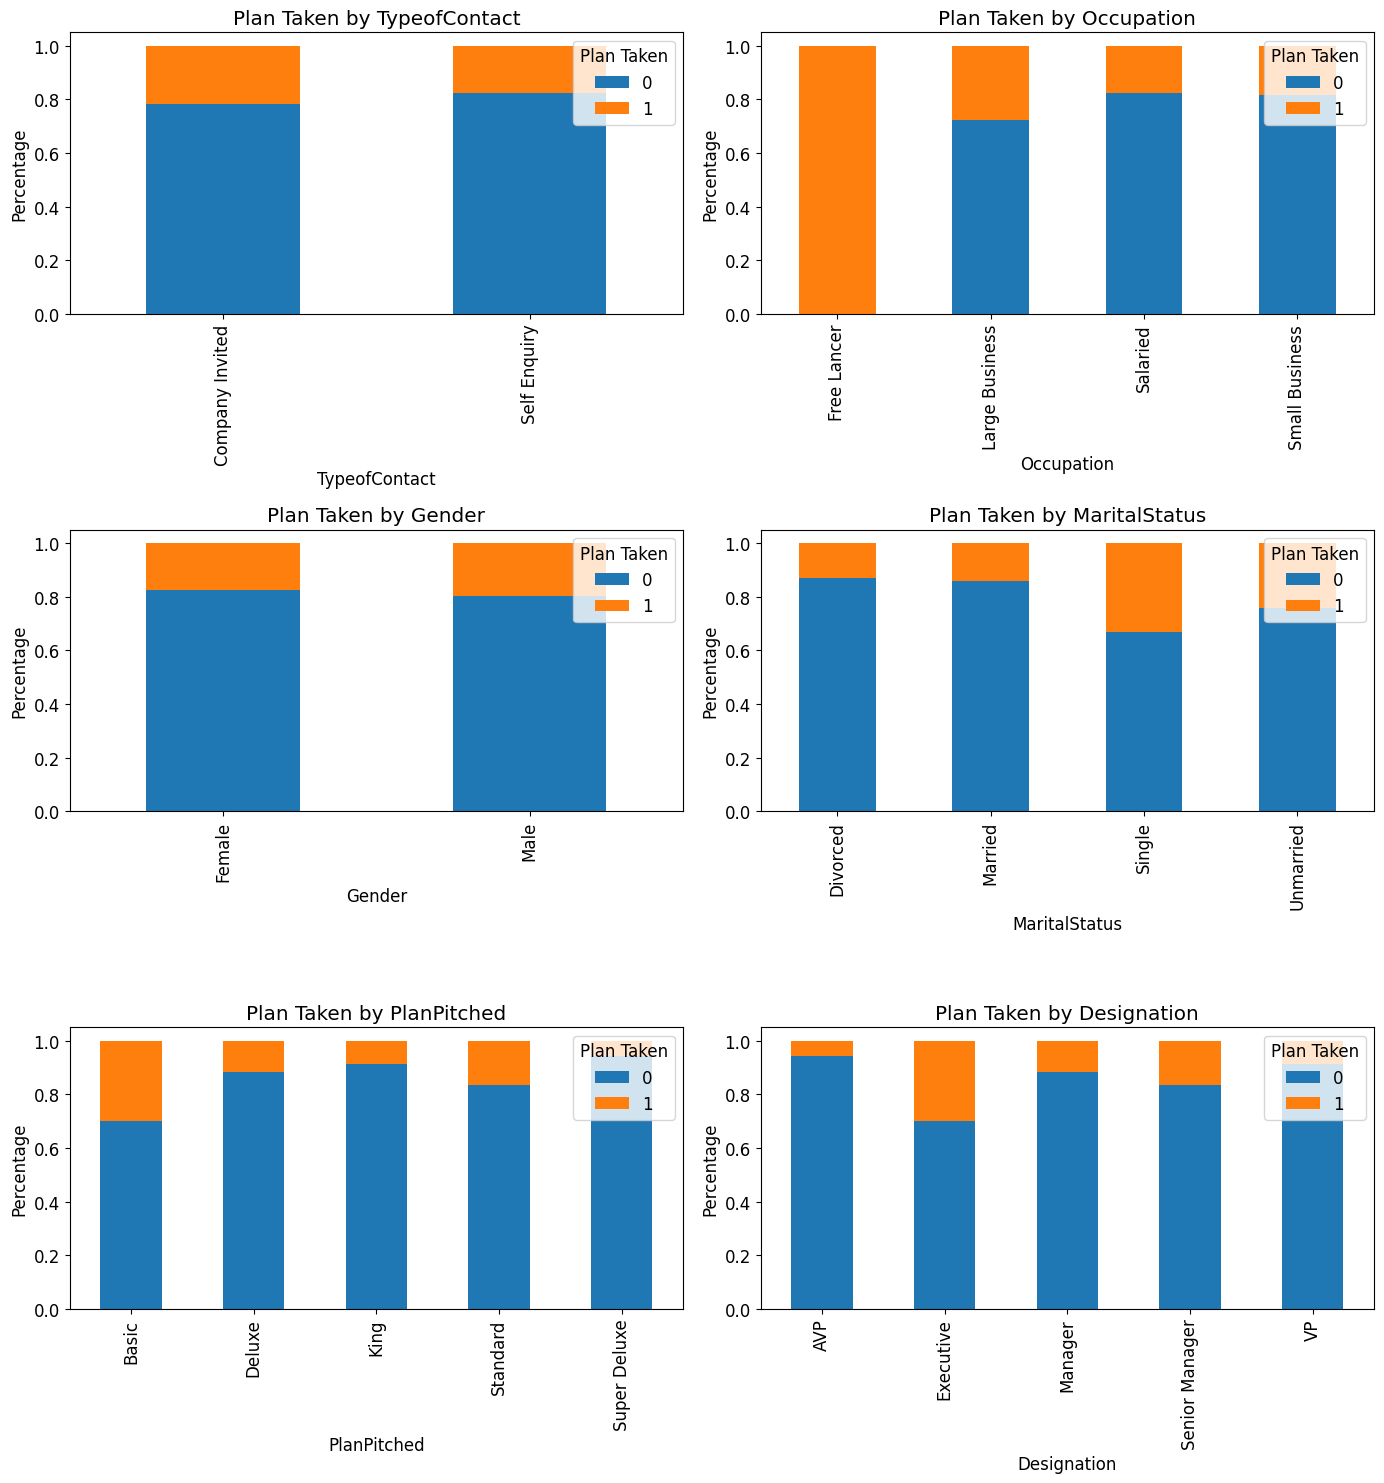

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
categorical_vars = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'PlanPitched', 'Designation']

# visualizing the relationship between categorical variables and PlanTaken target variable
for i, var in enumerate(categorical_vars):
    data_to_plot = df.groupby(var)['PlanTaken'].value_counts(normalize=True).unstack()
    data_to_plot.plot(kind='bar', stacked=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Plan Taken by {var}')
    axes[i//2, i%2].set_ylabel('Percentage')
    axes[i//2, i%2].legend(title='Plan Taken', loc='upper right')

plt.tight_layout()
plt.show()


Type of Contact: The proportion of plans taken appears slightly higher for Company Invited contacts compared to Self Enquiry.

Occupation: The proportion of plans taken varies across different occupations.

Gender: The plan uptake is somewhat similar between male and female customers, with a very slight edge for male customers.

Marital Status: 'Unmarried' individuals have a slightly higher proportion of taking up plans compared to 'Married' or 'Divorced' individuals.

Plan Pitched: Different plans seem to have varying success rates. Basic plan is taken by the most.

Designation: Exceutive and senior manager has been involved in the plans.

# **5. Data Preprocessing Handling Data Issues(Missing,Outliers)** <a class="anchor" id="7"></a>

In [80]:
# Print number of unique values in each column
for column in df.columns:
    unique_values = df[column].nunique()
    print("Number of unique values in {}: {}".format(column,unique_values))


Number of unique values in CustomerID: 4888
Number of unique values in PlanTaken: 2
Number of unique values in Age: 44
Number of unique values in TypeofContact: 2
Number of unique values in CityTier: 3
Number of unique values in DurationOfPitch: 34
Number of unique values in Occupation: 4
Number of unique values in Gender: 2
Number of unique values in NumberOfPersons: 5
Number of unique values in NumberOfFollowups: 6
Number of unique values in PlanPitched: 5
Number of unique values in PreferredServiceStar: 3
Number of unique values in MaritalStatus: 4
Number of unique values in NumberOfUpgrades: 12
Number of unique values in iPhone: 2
Number of unique values in PitchSatisfactionScore: 5
Number of unique values in PhoneContract: 2
Number of unique values in NumberOfChildren: 4
Number of unique values in Designation: 5
Number of unique values in MonthlyIncome: 2475


In [81]:
df.isna().sum().sort_values()

CustomerID                  0
PlanTaken                   0
PhoneContract               0
CityTier                    0
PitchSatisfactionScore      0
Occupation                  0
Gender                      0
NumberOfPersons             0
Designation                 0
PlanPitched                 0
MaritalStatus               0
iPhone                      0
TypeofContact              25
PreferredServiceStar       26
NumberOfFollowups          45
NumberOfChildren           66
NumberOfUpgrades          140
Age                       226
MonthlyIncome             233
DurationOfPitch           251
dtype: int64

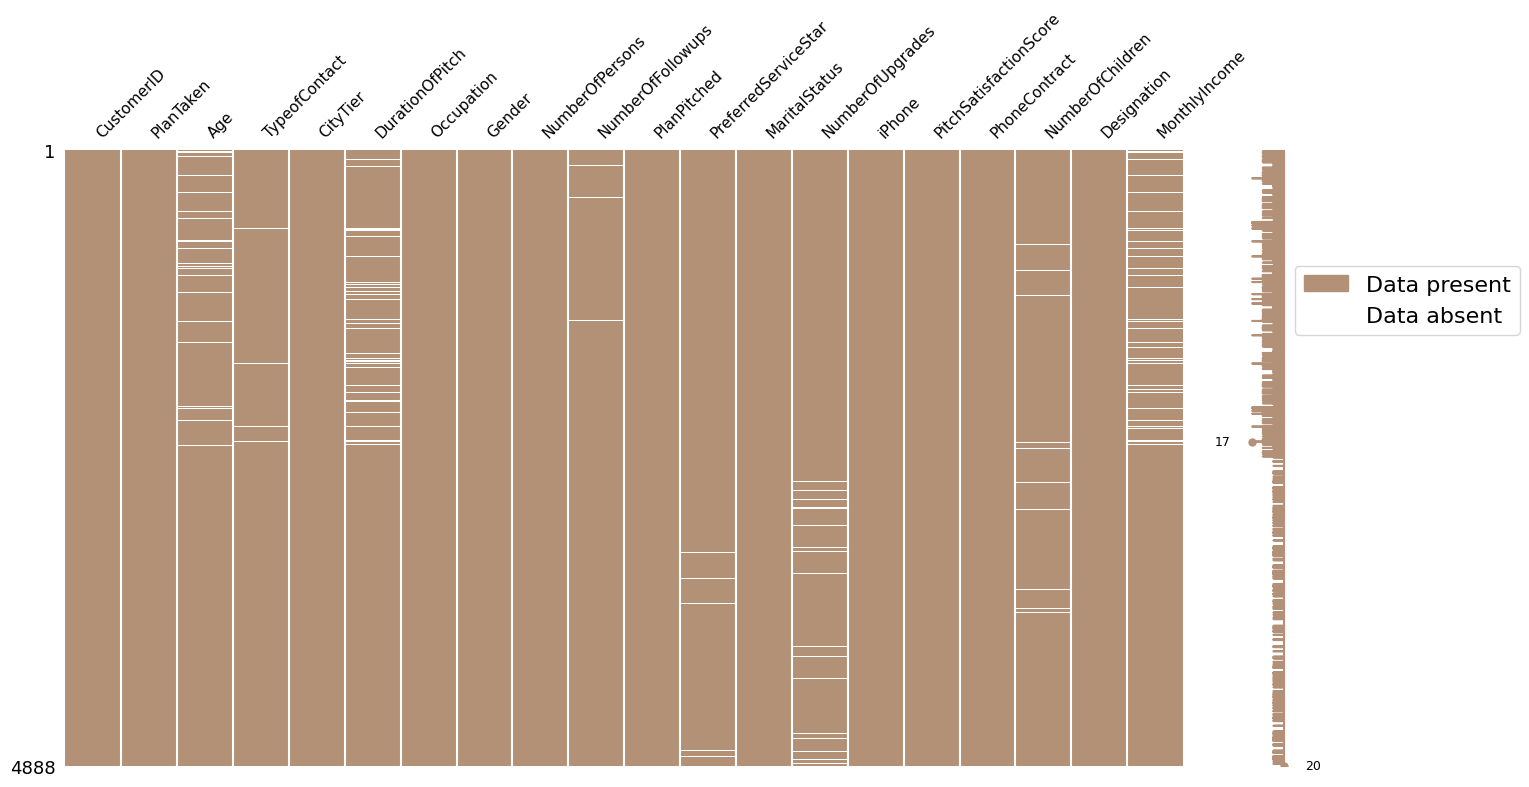

In [82]:
msno.matrix(df, sparkline=True, figsize=(16,8), fontsize=11, color=(0.7, 0.57, 0.47));

wheat_patch = mpatches.Patch(color='#B29177',label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')

plt.legend(loc=[1.1,0.7], handles=[wheat_patch, white_patch], fontsize=16)
plt.show()

* White lines indicate the location of missing values
* From the sparkline, we can see that there are observations without any missing values and the minimum number of values is 17, even for rows with the maximum nullity.

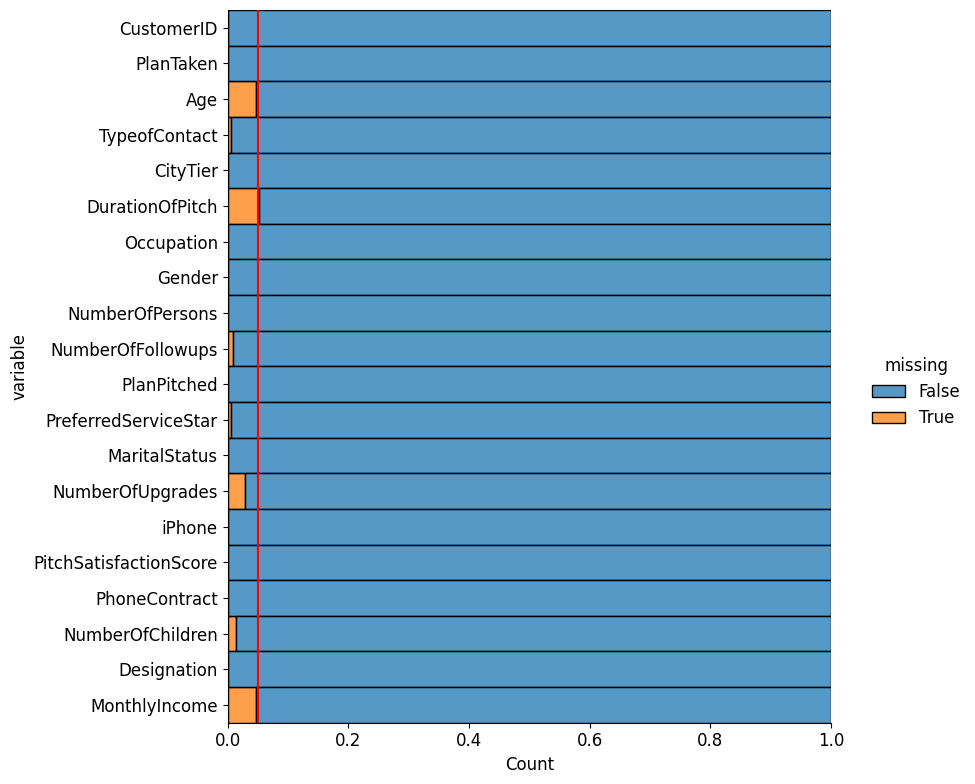

In [83]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.05, color='r')

###### The dataset is relatively complete as none of the variables have a missing proportion greater than 5%.

### Handling Missing Values for both Numerical and categorical and Outliers for Numerical Columns.

In [84]:
numerical_columns = []
categorical_columns = []

for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values >= 20:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)
print("Numerical COlumns : ", numerical_columns)
print("Categorical Columns : ", categorical_columns)

Numerical COlumns :  ['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']
Categorical Columns :  ['PlanTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersons', 'NumberOfFollowups', 'PlanPitched', 'PreferredServiceStar', 'MaritalStatus', 'NumberOfUpgrades', 'iPhone', 'PitchSatisfactionScore', 'PhoneContract', 'NumberOfChildren', 'Designation']


In [85]:
df[numerical_columns].isnull().sum()

CustomerID           0
Age                226
DurationOfPitch    251
MonthlyIncome      233
dtype: int64

In [86]:
numerical_columns.remove('CustomerID')
numerical_columns

['Age', 'DurationOfPitch', 'MonthlyIncome']

In [87]:
for col in categorical_columns:
    print(col)
    print(df[col].unique())

PlanTaken
[1 0]
TypeofContact
['Self Enquiry' 'Company Invited' nan]
CityTier
[3 1 2]
Occupation
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender
['Female' 'Male']
NumberOfPersons
[3 2 1 4 5]
NumberOfFollowups
[ 3.  4.  2.  5. nan  1.  6.]
PlanPitched
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
PreferredServiceStar
[ 3.  4.  5. nan]
MaritalStatus
['Single' 'Divorced' 'Married' 'Unmarried']
NumberOfUpgrades
[ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]
iPhone
[1 0]
PitchSatisfactionScore
[2 3 5 4 1]
PhoneContract
[1 0]
NumberOfChildren
[ 0.  2.  1. nan  3.]
Designation
['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


In [88]:
def dist_wishker_plot(feature,feature_name):
    plt.figure(figsize=(12,5),dpi=100)
    plt.subplot(1,2,1)
    ax = sns.distplot(feature, kde=True)
    # Calculate mean and median
    mean = feature.mean()
    median = feature.median()
    # Add mean and median annotations
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='-', label='Median')

    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(data=feature,showmeans=True,color='aqua')
    plt.title(feature_name)
    # Show the plot
    plt.show()

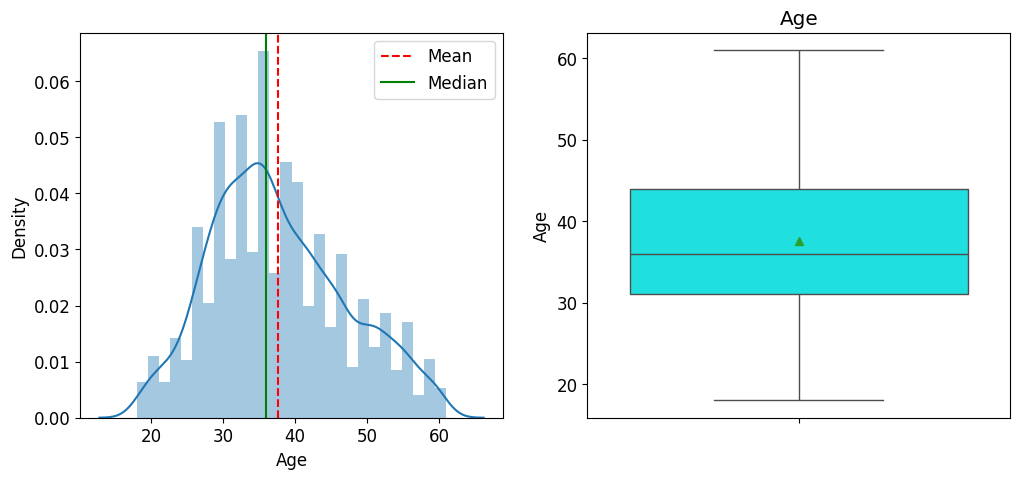

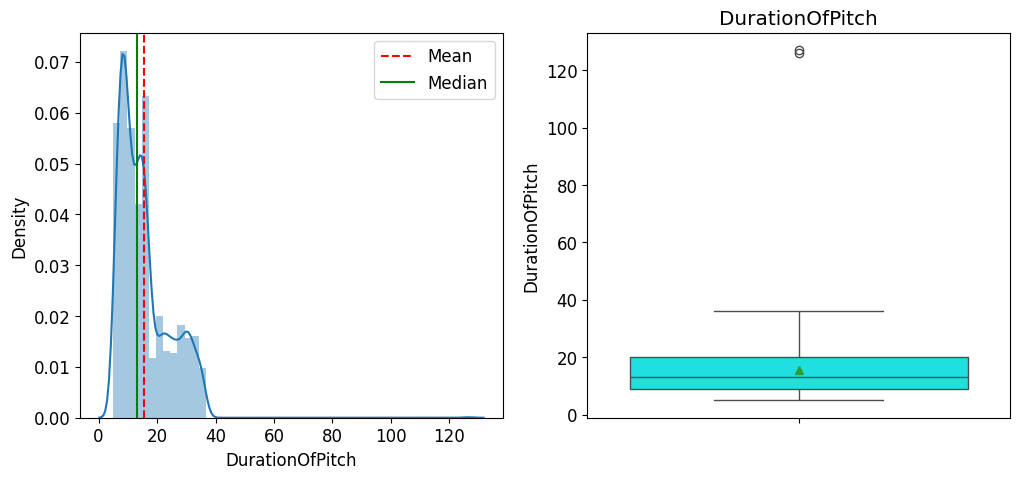

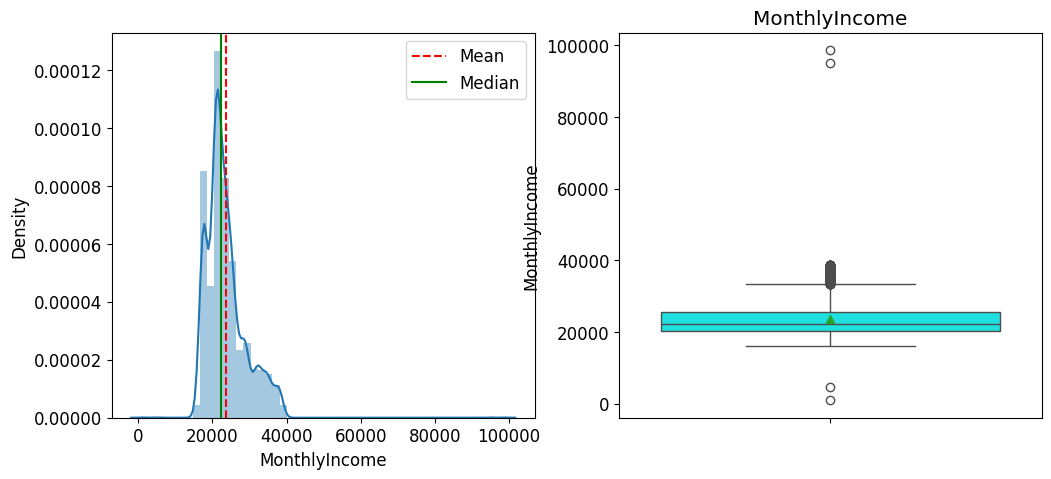

In [89]:
for col in numerical_columns:
    dist_wishker_plot(df[col],col)

In [90]:
# Replacing the missing values with median for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
        # Imputing with median
        df[column].fillna(df[column].median(), inplace=True)


# Replacing the missing values with mode for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

CustomerID                0
PlanTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfPersons           0
NumberOfFollowups         0
PlanPitched               0
PreferredServiceStar      0
MaritalStatus             0
NumberOfUpgrades          0
iPhone                    0
PitchSatisfactionScore    0
PhoneContract             0
NumberOfChildren          0
Designation               0
MonthlyIncome             0
dtype: int64

### Outlier Detection and Handling:
* According to our analysis handling outliers in the 'MonthlyIncome' column is a critical step in data preprocessing to ensure that subsequent analyses and models are based on accurate, representative data.

In [91]:
def replace_outliers_with_bounds(data, feature):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("Upper bound for {} : {} ".format(feature, upper_bound))
    print("Lower bound for {} : {} ".format(feature, lower_bound))

    # Identify outliers using the IQR method
    outliers = (data < lower_bound) | (data > upper_bound)
    print(outliers)

    # Replace outliers with the minimum and maximum values within bounds
    data_no_outliers = np.clip(data, lower_bound, upper_bound)

    return data_no_outliers

##### By using IQR and capping, we mitigated the adverse effects of outliers on our models while maintaining the overall distribution and structure of our data.
* This approach is particularly useful when we suspect that the outliers are not due to errors but are natural variations in the data.
* Using IQR to detect outliers is a standard practice.
* Typically, data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.
* Instead of outright removing these outliers, which can lead to loss of valuable information, capping them or replacing them with a threshold value helps in reducing their impact while preserving the data's integrity.

In [92]:
for column in numerical_columns:
    if column == 'Age':
        pass
    else:
        replaced_data = replace_outliers_with_bounds(df[column].values,column)
        df[column] = replaced_data

Upper bound for DurationOfPitch : 34.0 
Lower bound for DurationOfPitch : -6.0 
[False False False ... False False False]
Upper bound for MonthlyIncome : 32834.375 
Lower bound for MonthlyIncome : 13075.375 
[False False False ... False False False]


### Distribution of data after handling outliers

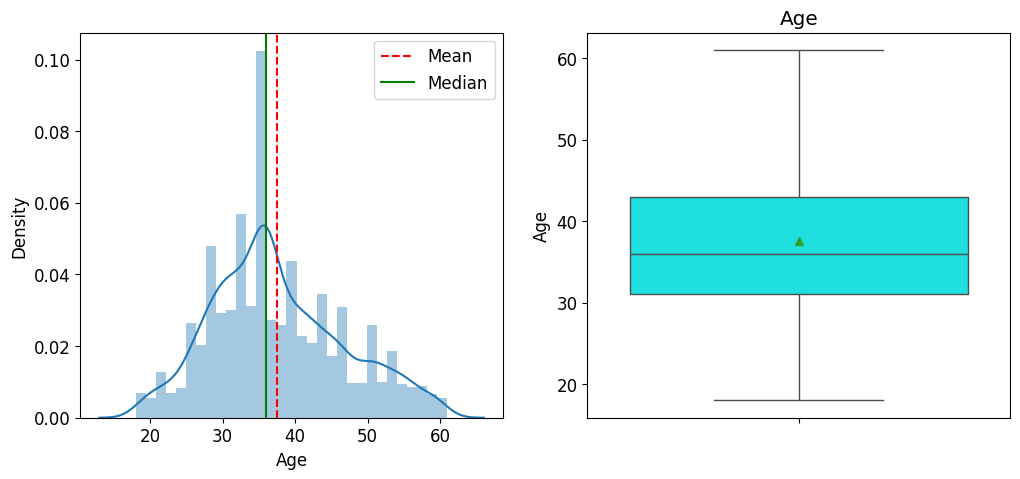

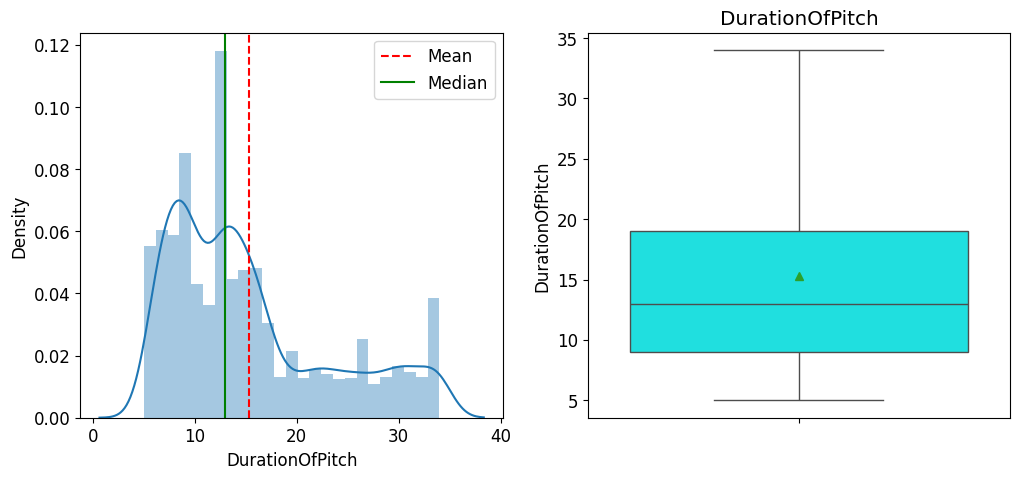

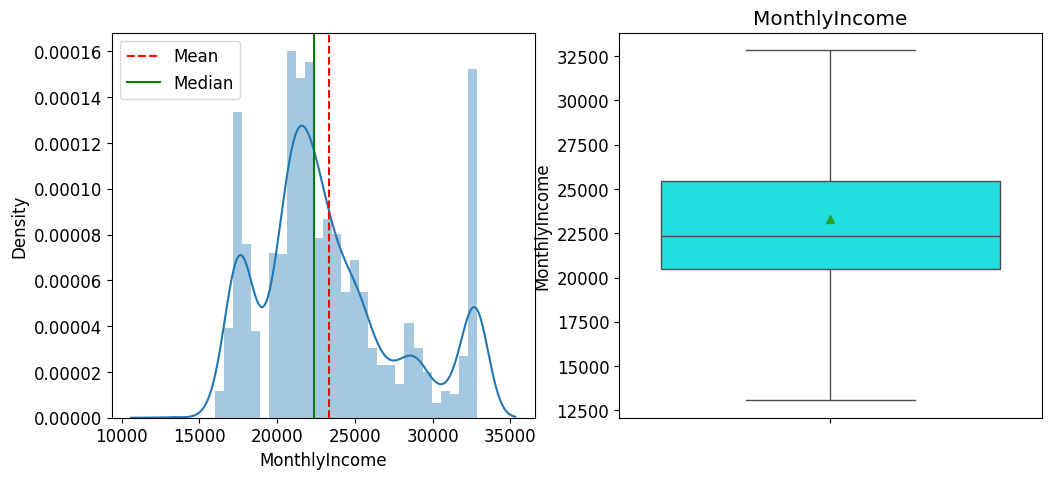

In [93]:
for col in numerical_columns:
    dist_wishker_plot(df[col],col)

**Observations -**
* Preprocessing reduced right-skewness in 'MonthlyIncome,' making the distribution more balanced.
* Outliers in 'MonthlyIncome' were effectively capped during preprocessing, resulting in a more controlled distribution.

# **6. Hypothesis Testing** <a class="anchor" id="6"></a>

In [94]:
import scipy.stats as stats

cleaned_df = df.copy()

In [95]:
plan_1 = cleaned_df[cleaned_df['PlanTaken'] == 1]['Age']
plan_0 = cleaned_df[cleaned_df['PlanTaken'] == 0]['Age']

statistic, p_value = stats.levene(plan_0, plan_1)
print(f"Levene's test statistic: {statistic}, p-value: {p_value}")


alpha = 0.05

if p_value > alpha:
    print("Failed to reject the null hypothesis.")

else:
    print("Reject the null hypothesis.")

Levene's test statistic: 11.209840147735767, p-value: 0.0008198025468889019
Reject the null hypothesis.


In [96]:
plan_1 = cleaned_df[cleaned_df['PlanTaken'] == 1]['Age']
plan_0 = cleaned_df[cleaned_df['PlanTaken'] == 0]['Age']
t_stat, p_value = stats.ttest_ind(plan_0, plan_1, equal_var=False)

alpha = 0.05

if p_value > alpha:
    print("failed to reject the null hypothesis.")

else:
    print(" reject the null hypothesis.")

 reject the null hypothesis.


In [97]:
from scipy.stats import chi2_contingency

data = cleaned_df.copy()
dataset = pd.crosstab(data['Gender'], data['PlanTaken'])

alpha = 0.05
statistic, p_value, degrees_of_freedom, expected = chi2_contingency(dataset)
print(p_value)

if p_value > alpha:
    print('Accept Null Hypothesis: Gender is Independent of PlanTaken')
else:
    print('Reject Null Hypothesis: Gender is Dependent on PlanTaken')

0.03252910196963086
Reject Null Hypothesis: Gender is Dependent on PlanTaken


In [98]:
data = cleaned_df.copy()
dataset = pd.crosstab(data['PlanPitched'], data['PlanTaken'])

alpha = 0.05
statistic, p_value, degrees_of_freedom, expected = chi2_contingency(dataset)
print(p_value)

if p_value > alpha:
    print('Accept Null Hypothesis: PlanPitched is Independent of PlanTaken')
else:
    print('Reject Null Hypothesis: PlanPitched is Dependent on PlanTaken')

2.42359680098374e-55
Reject Null Hypothesis: PlanPitched is Dependent on PlanTaken


In [99]:
dataset = pd.crosstab(data['MaritalStatus'], data['PlanTaken'])

alpha = 0.05
statistic, p_value, degrees_of_freedom, expected = chi2_contingency(dataset)
print(p_value)

if p_value > alpha:
    print('Accept Null Hypothesis: MaritalStatus is Independent of PlanTaken')
else:
    print('Reject Null Hypothesis: MaritalStatus is Dependent on PlanTaken')

6.072002571578408e-42
Reject Null Hypothesis: MaritalStatus is Dependent on PlanTaken


# **7. Model Building** <a class="anchor" id="8"></a>

##checking the numerical values
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
print('The lenght of numerical features ',len(categorical_feature))
df[categorical_feature].head()

In [100]:
##checking the numerical values
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
print('The lenght of numerical features ',len(categorical_feature))
df[categorical_feature].head()

The lenght of numerical features  6


,TypeofContact,Occupation,Gender,PlanPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [101]:
df['PlanPitched'].unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

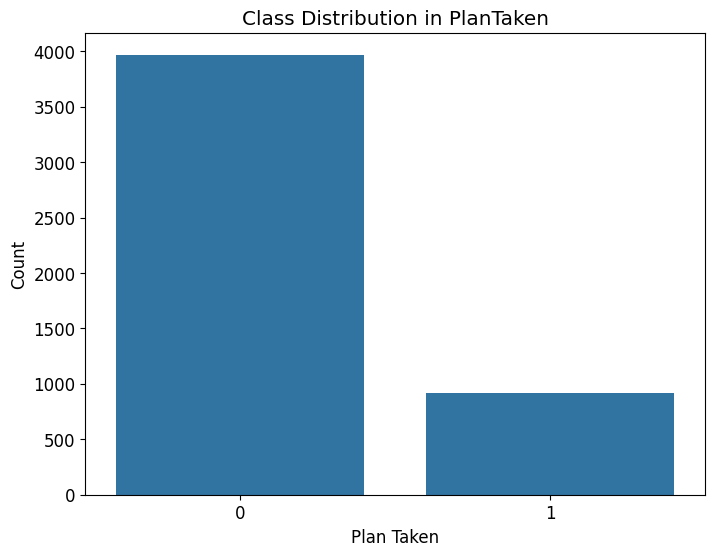

In [102]:
# Checking for class imbalance
class_imbalance_check = df['PlanTaken']

# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=class_imbalance_check)
plt.title('Class Distribution in PlanTaken')
plt.xlabel('Plan Taken')
plt.ylabel('Count')
plt.show()

In [103]:
X = df.drop('PlanTaken', axis=1)
y = df['PlanTaken']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Feature scaling
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])

# One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_cols])

X_processed = np.hstack((X_numerical_scaled, X_categorical_encoded))

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

In [104]:
# Applying SMOTE to address the class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

[(0, 3170), (1, 3170)]


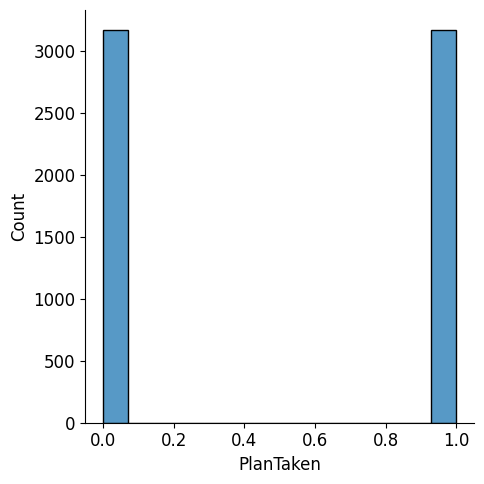

In [105]:
# checking the resampled data
print(sorted(Counter(y_train_smote).items()))
sns.displot(y_train_smote)

## **8.1 Logistic Regression** <a class="anchor" id="8.1"></a>

In [106]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Type of regularization
}

#Initializing the model
logreg = LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Identifying the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluating the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("Best Model Metrics:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("\nBest Model Parameters:", best_params)

Best Model Metrics:
Accuracy: 0.7638036809815951
Precision: 0.4129692832764505
Recall: 0.6722222222222223
Confusion Matrix:
 [[626 172]
 [ 59 121]]

Best Model Parameters: {'C': 0.1, 'penalty': 'l1'}


## **8.2 Deep Neural Network** <a class="anchor" id="8.2"></a>

In [107]:
input_size = 35

# initilizing the ann model
ann = Sequential()

# adding hidden layers
ann.add(Dense(units=64, input_dim=input_size, activation='relu'))
# ann.add(Dropout(rate=0.3))
ann.add(Dense(units=32, activation='relu'))
# ann.add(Dropout(rate=0.2))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=8, activation='relu'))

# adding output layer
ann.add(Dense(units=1, activation='sigmoid'))

# establising the connection
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# stopping early according to accuracy
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)



In [108]:
X_train_smote.shape

(6340, 35)

In [109]:
# fitting the model
ann.fit(X_train_smote, y_train_smote, batch_size=20, epochs=500, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/500
317/317 [==============================] - 2s 3ms/step - loss: 0.5384 - accuracy: 0.7352 - val_loss: 0.4566 - val_accuracy: 0.8129
Epoch 2/500
317/317 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.7994 - val_loss: 0.4005 - val_accuracy: 0.8272
Epoch 3/500
317/317 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8355 - val_loss: 0.3921 - val_accuracy: 0.8456
Epoch 4/500
317/317 [==============================] - 1s 3ms/step - loss: 0.3246 - accuracy: 0.8707 - val_loss: 0.3706 - val_accuracy: 0.8497
Epoch 5/500
317/317 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.9043 - val_loss: 0.3548 - val_accuracy: 0.8507
Epoch 6/500
317/317 [==============================] - 1s 2ms/step - loss: 0.1900 - accuracy: 0.9338 - val_loss: 0.3175 - val_accuracy: 0.8732
Epoch 7/500
317/317 [==============================] - 1s 3ms/step - loss: 0.1418 - accuracy: 0.9516 - val_loss: 0.2977 - val_accuracy: 0.8926

<Axes: >

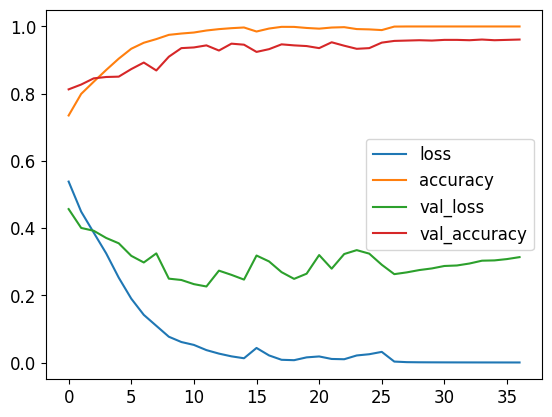

In [110]:
# loss function
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [111]:
# predicting
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5

31/31 [==============================] - 0s 1ms/step


## **9. Principle Component Analysis** <a class="anchor" id="5.1"></a>

In [112]:
pca = PCA(n_components=None)

In [113]:
dfx_pca = pca.fit(X_numerical_scaled)

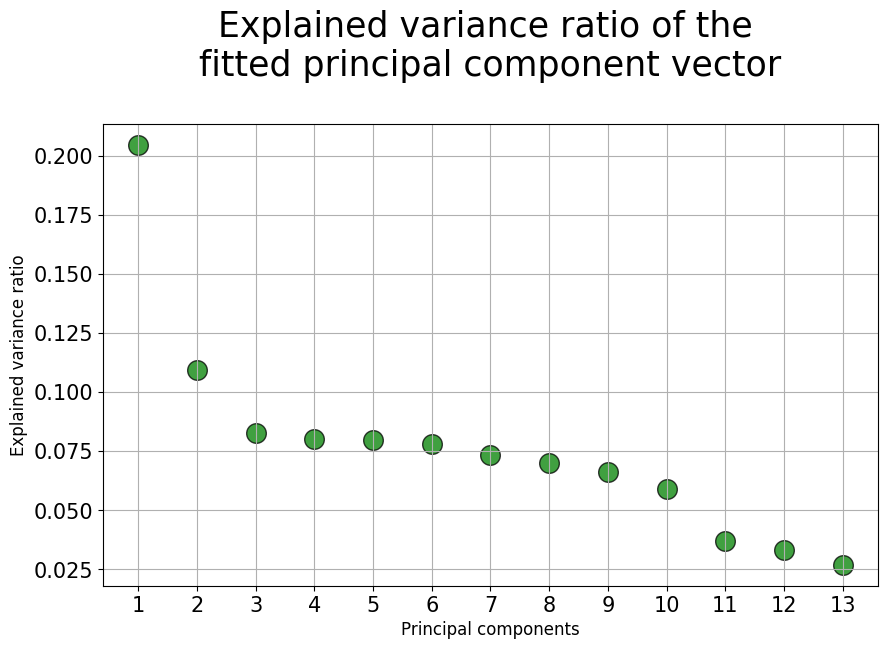

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='green',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components")
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio")
plt.show()

The scree plot from the Principal Component Analysis (PCA) indicates that neither a single principal component nor a small subset of them accounts for a substantial amount of the data's variance. Therefore, we have decided not to move forward with PCA for dimensionality reduction

# **10. Model Evaluation** <a class="anchor" id="10"></a>

## **Confusion matrix** <a class="anchor" id="9.1"></a>

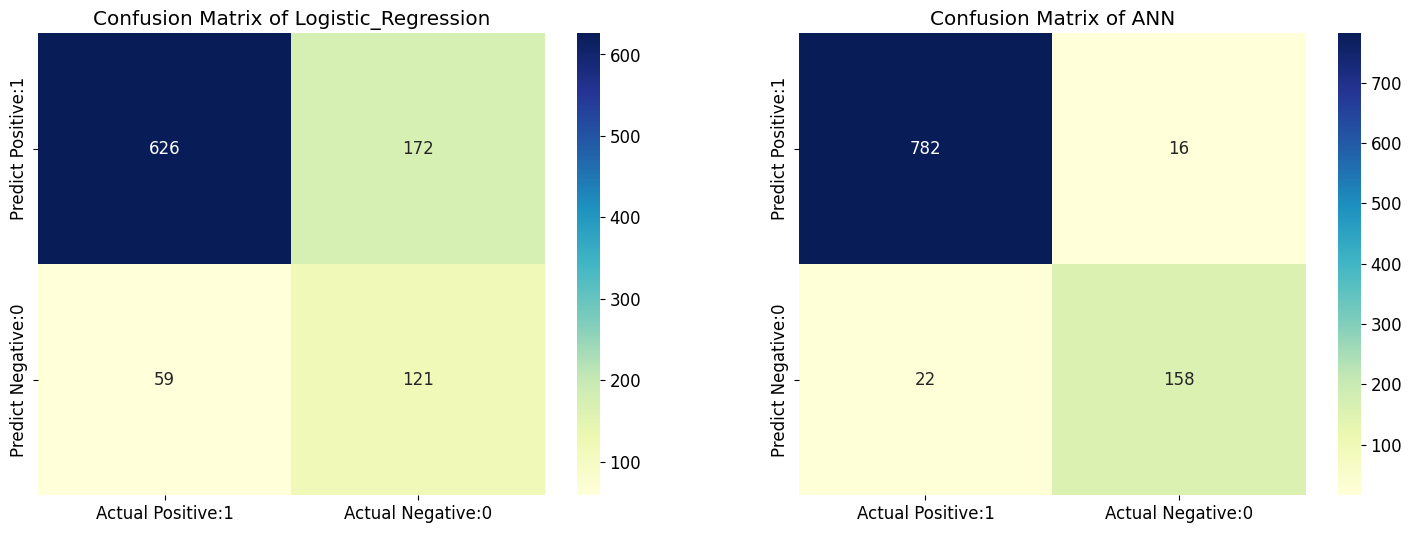

In [115]:
plt.figure(figsize=(18,6),dpi=100)
plt.subplot(1,2,1)
cm_matrix = pd.DataFrame(data=conf_matrix_best, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

ax1 = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix of Logistic_Regression")

plt.subplot(1,2,2)
cm_dnn = confusion_matrix(y_test, y_pred)
cm_matrix_dnn = pd.DataFrame(data=cm_dnn, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_dnn, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix of ANN")
plt.show()

In [116]:
print('Confusion matrix for Logistic Regression')
print('\nTrue Positives(TP) = ', conf_matrix_best[0,0])
print('\nTrue Negatives(TN) = ', conf_matrix_best[1,1])
print('\nFalse Positives(FP) = ', conf_matrix_best[0,1])
print('\nFalse Negatives(FN) = ', conf_matrix_best[1,0])

Confusion matrix for Logistic Regression

True Positives(TP) =  626

True Negatives(TN) =  121

False Positives(FP) =  172

False Negatives(FN) =  59


In [117]:
print('Confusion matrix for DNN')
print('\nTrue Positives(TP) = ', cm_dnn[0,0])
print('\nTrue Negatives(TN) = ', cm_dnn[1,1])
print('\nFalse Positives(FP) = ', cm_dnn[0,1])
print('\nFalse Negatives(FN) = ', cm_dnn[1,0])

Confusion matrix for DNN

True Positives(TP) =  782

True Negatives(TN) =  158

False Positives(FP) =  16

False Negatives(FN) =  22


## **Classification metrics** <a class="anchor" id="9.2"></a>

In [118]:
from sklearn.metrics import classification_report   # accuracy, recall, presion and f1 score
print("----------------------Classification Report of Logistic Regression-------------------------------")
print(classification_report(y_test, y_pred_best))

----------------------Classification Report of Logistic Regression-------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       798
           1       0.41      0.67      0.51       180

    accuracy                           0.76       978
   macro avg       0.66      0.73      0.68       978
weighted avg       0.82      0.76      0.78       978



In [119]:
print("----------------------Classification Report of ANN model-------------------------------")
print(classification_report(y_test, y_pred))

----------------------Classification Report of ANN model-------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       798
           1       0.91      0.88      0.89       180

    accuracy                           0.96       978
   macro avg       0.94      0.93      0.93       978
weighted avg       0.96      0.96      0.96       978



## **ROC - AUC** <a class="anchor" id="9.3"></a>


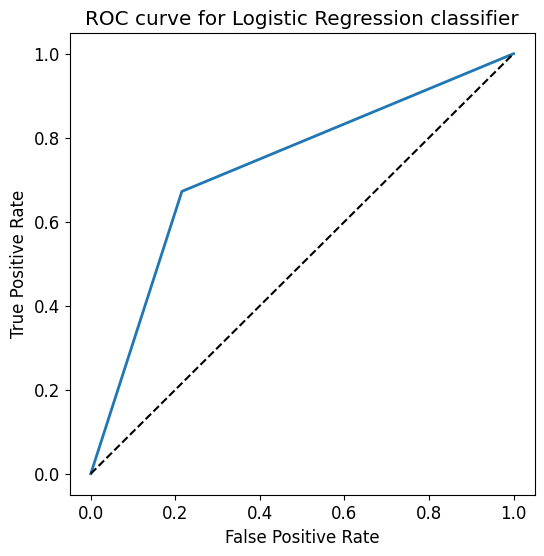

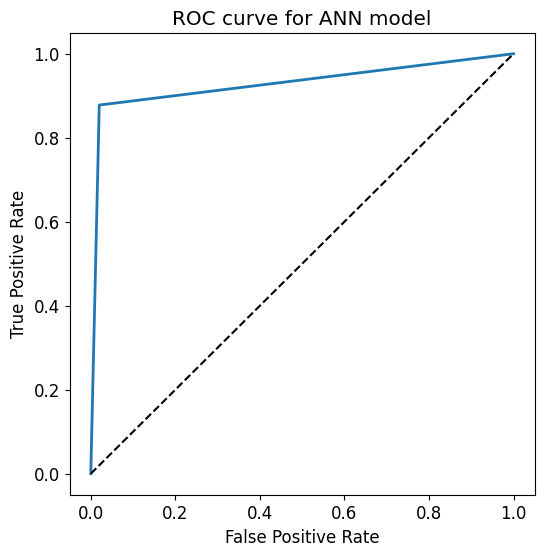

In [120]:
# plot ROC Curve
from sklearn.metrics import roc_curve

# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds = roc_curve(y_test, y_pred_best)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(fpr_log_reg, tpr_log_reg, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# ROC Curve for ANN Model
fpr_ann, tpr_ann, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(fpr_ann, tpr_ann, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for ANN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [121]:
# compute ROC AUC for logistic regression
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_best)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7283


In [122]:
# compute ROC AUC for ANN model
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9289


# **11. Findings and conclusion** <a class="anchor" id="11"></a>

1. Data Completeness: The dataset was relatively complete with none of the variables having a missing proportion greater than 5%.

2. Handling Missing Values: Missing values were efficiently handled by imputing median values for numerical columns and mode values for categorical columns.

3. Outlier Treatment: Outliers in the 'MonthlyIncome' column were capped, which helped in reducing their impact while preserving the data's integrity.

4. Feature Engineering: Principle Component Analysis (PCA) was considered but not utilized as no single or small subset of principal components accounted for a significant portion of the data's variance.

5. Hypothesis Testing: The Mann-Whitney U test revealed a statistically significant difference in the Monthly Income distributions between two groups categorized by PlanTaken. Tests like Levene's test for equal variances and Welch's t-test were employed for robust statistical analysis.

6. Statistical Analysis and Modeling: The study utilized Logistic Regression and Artificial Neural Networks (ANN) for predictive modeling. The models were evaluated on various metrics such as accuracy, precision, recall, and confusion matrices. The models demonstrated decent performance with ANN showing a higher accuracy and precision.

7. Feature Scaling: Techniques like One-Hot Encoding, and StandardScaler were used to transform features into a suitable format for modeling.
